In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "mother": [58,62,60,64,67,70],
    "daughter": [60,60,58,60,70,72]
}

df = pd.DataFrame(data)
print(df.shape)

(6, 2)


0.01661768664391587 0.9826758331490595


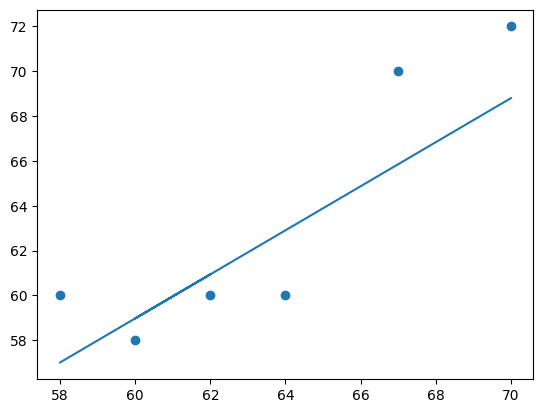

In [57]:
b0, b1 = 0, 0
alpha = 0.0001
n = df.shape[0]
epochs = 4
epoch_error = []

for j in range(epochs):
    for i in range(n):
        x = df['daughter'][i]
        yi = df['mother'][i]
        pi = b0 + b1*x
        err = pi-yi
        epoch_error.append(abs(err))

        b0 = b0 - alpha*err
        b1 = b1 - alpha*err*x

print(b0, b1)
predictions = b0 + b1*df["mother"]

plt.scatter(df["mother"], df["daughter"])
plt.plot(df["mother"], predictions)
plt.show()


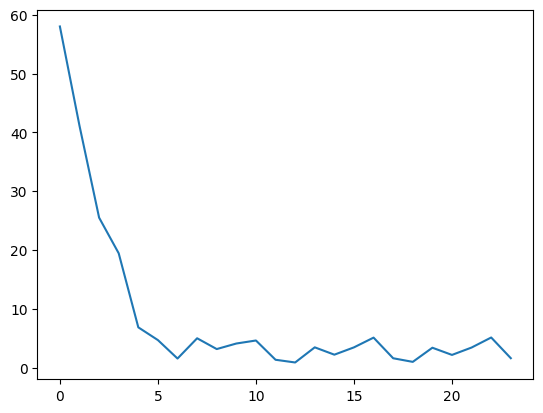

In [58]:
plt.plot( epoch_error )


[[1.20603015]] [-13.24958124]


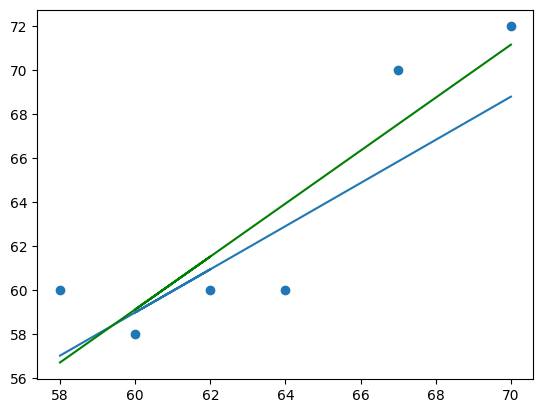

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(data["mother"]).reshape(-1,1)
y = np.array(data["daughter"]).reshape(-1, 1)
model.fit(x, y)
print(model.coef_ ,model.intercept_)

b0 = model.intercept_
b1 = model.coef_[0]

pred_sklearn = b0 + b1*x

plt.scatter(df["mother"], df["daughter"])
plt.plot(df["mother"], predictions)
plt.plot(df["mother"], pred_sklearn, color = "green")
plt.show()

q2

In [60]:
data = {
    "time": [1,2,3,4,5,6,7,8],
    "pass": [0,0,0,0,1,1,1,1]
}

df = pd.DataFrame(data)

In [61]:
b0, b1 = 0, 0 
alpha = 0.01
epochs = 8
n = df.shape[0]
errors = []

for j in range(epochs):
    for i in range(n):
        x = df["time"][i]  # Access the feature value
        zi = b0 + b1 * x
        pi = 1 / (1 + np.exp(-zi))
        yi = df["pass"][i]  # Correctly access the target variable at index i

        err = pi - yi

        # Update the coefficients
        b0 = b0 - alpha * err * pi * (1 - pi)
        b1 = b1 - alpha * err * pi * (1 - pi) * x
        errors.append(abs(err))

predictions = []
x = np.array(df["time"])
for item in x:
    zi = b0 + b1 * item
    pi = 1 / (1 + np.exp(-zi))
    if pi > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

print(predictions)
print(errors)



[1, 1, 1, 1, 1, 1, 1, 1]
[0.5, 0.49906250109863126, 0.496566663197203, 0.4915966607473946, 0.51671562720164, 0.5098164101964359, 0.4976047125698184, 0.4794614793789296, 0.5050074215745782, 0.5090580541734421, 0.511513264004744, 0.5114060172610096, 0.4922133844991927, 0.48087765482810985, 0.464674687746796, 0.44324147364194477, 0.5092647411838557, 0.5176629160882592, 0.5244296816419672, 0.5285617609743876, 0.47094103108032015, 0.45583349066946766, 0.43634716309267163, 0.4123620848282801, 0.5128363297726116, 0.5249931823582151, 0.5354787005212646, 0.5432620205055637, 0.4526865164366204, 0.43441833852313216, 0.4122656939425433, 0.3863185059143748, 0.5158032464546175, 0.5311985986471075, 0.5448779189919561, 0.5557876732037795, 0.4371177415683136, 0.4162176716463195, 0.39190882952114425, 0.36445281678040053, 0.5182481771695157, 0.5364331496650279, 0.5528537063524309, 0.566436495303292, 0.42387164082594386, 0.40078148869122265, 0.37472605015356086, 0.34610303729112657, 0.5202476868687201, 0.

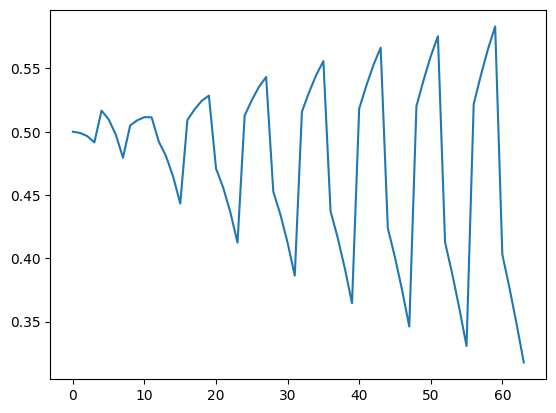

In [62]:
plt.plot(errors)
plt.show()

#q3

In [63]:
import pandas as pd

# Create the DataFrame with the given data
data = {
    'x1': [4, 2, 1, 3, 1, 6],
    'x2': [1, 8, 0, 2, 4, 7],
    'y': [2, -14, 1, -1, -7, -8]
}

df = pd.DataFrame(data)

print(df)



   x1  x2   y
0   4   1   2
1   2   8 -14
2   1   0   1
3   3   2  -1
4   1   4  -7
5   6   7  -8


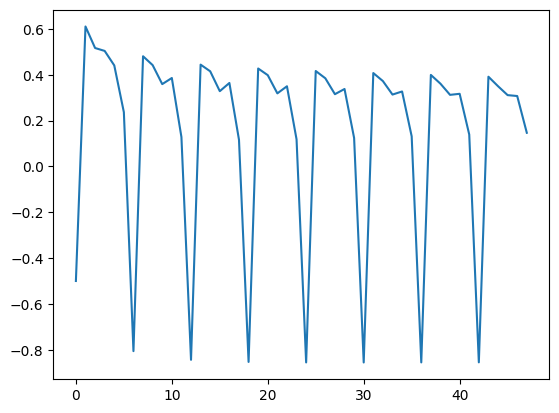

In [64]:
b0, b1, b2 = 0 , 0 , 0
alpha = 0.1
epochs = 8
n = df.shape[0]

for i in range(n):
    if df["y"][i] > 1:
        df["y"][i] = 1
    else:
        df["y"][i] = 0

errors = []

for j in range(epochs):
    for i in range(n):
        x1 = df["x1"][i]
        x2 = df["x2"][i]
        z0 = b0 + b1*x1 + b2*x2
        pi = 1 / (1 + np.exp(-(z0)))
        yi = df["y"][i]

        err = pi - yi
        errors.append(err)
        b0 = b0 - alpha*err
        b1 = b1 - alpha*err*x1
        x2 = b2 - alpha*err*x2


predictions = b0 + b1*df["x1"] + b2*df["x2"]

plt.plot(errors)
plt.show()

